**Summary**

In this tutorial we will enrich Beluga whale observations with bathymetry information.

You will first prepare the dataset to be enriched.
It can be your own DarwinCore archive, or you can download one from GBIF.
An enrichment file will be created where data will be added later on.

Afterwards, you can pick a variable id from the [catalog file](geoenrich/catalog.csv). If the variable you want is not available, feel free to update the *catalog.csv* file with new rows (see [installation instructions](https://geoenrich.readthedocs.io/en/latest/install.html)).


# Download from GBIF

In [1]:
from biodiv import *
from enrichment import create_enrichment_file

ModuleNotFoundError: No module named 'biodiv'

#### Get GBIF id for the taxon of interest

In [2]:
taxKey = get_taxon_key('Delphinapterus leucas')

Selected taxon: SPECIES: Delphinapterus leucas (Pallas, 1776)


#### Request an archive with all occurrences of this taxon

In [3]:
request_id = request_from_gbif(taxKey)

INFO:Your download key is 0201232-210914110416597


#### Download request

For large requests, some waiting time is needed for the archive to be ready.

In [6]:
download_requested(request_key = request_id)

INFO:Download file size: 1621631 bytes
INFO:On disk at /media/Data/Data/biodiv/gbif/0201232-210914110416597.zip


#### Prepare enrichment file from the GBIF data. 

Any DarwinCore archive may be used instead.

In [5]:
# Load previously downloaded Beluga data
geodf = open_dwca(taxonKey = taxKey)

# Or any DarwinCore archive
geodf = open_dwca(path = biodiv_path + 'gbif/' + str(taxKey) + '.zip')

create_enrichment_file(geodf, 'gbif_' + str(taxKey))

6632 occurrences were loaded.
6632 occurrences were loaded.
File saved at /media/Data/Data/biodiv/gbif_5220003.csv


# Enrich

In [4]:
from geoenrich.enrichment import enrich
from geoenrich.biodiv import get_taxon_key

#### Define enrichment scope

In [5]:
taxkey = get_taxon_key('Delphinapterus leucas')
var_id = 'bathymetry'
dataset_ref = 'gbif_' + str(taxkey)

Selected taxon: SPECIES: Delphinapterus leucas (Pallas, 1776)


#### Enrich

Only enrich a small slice first to check speed.

In [9]:
enrich(dataset_ref, var_id, slice = (0, 100), geo_buff = 115, time_buff = 0)

6632 occurrences were loaded from enrichment file


100%|█████████████████████████████████████████| 100/100 [02:02<00:00,  1.23s/it]

Enrichment over


# Data retrieval

In [37]:
from geoenrich.enrichment import enrichment_status, read_ids, retrieve_data

taxkey = get_taxon_key('Delphinapterus leucas')
var_id = 'bathymetry'
dataset_ref = 'gbif_' + str(taxkey)

Selected taxon: SPECIES: Delphinapterus leucas (Pallas, 1776)


#### Check the enrichment status of the dataset.

In [11]:
enrichment_status(dataset_ref)

bathymetry
Enriched                   100
Not enriched              6532
Data not available           0


#### Request data from local storage for the first row of our dataset.

In [8]:
ids = read_ids(dataset_ref)
output = retrieve_data(dataset_ref, ids[0])

#### Unpack and plot data

In [38]:
data = output[var_id]['values']
unit = output[var_id]['unit']
coords = output[var_id]['coords']

In [39]:
# Check order of the dimensions
for c in coords:
    print(c[0])

latitude
longitude


<IPython.core.display.Javascript object>


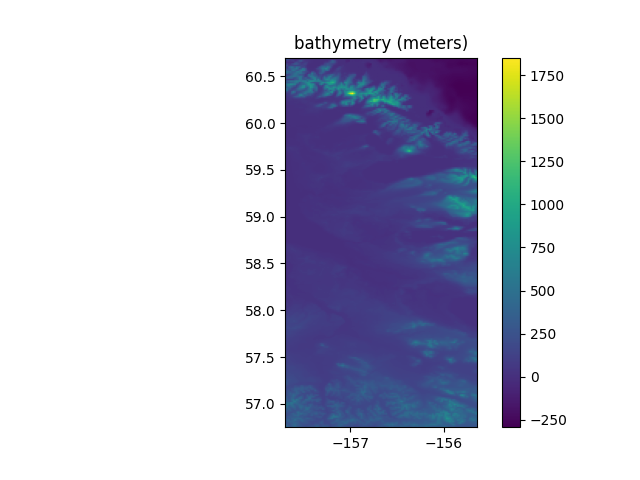

In [42]:
from matplotlib import pyplot as plt
%matplotlib notebook

lats = coords[0][1]
longs = coords[1][1]

extent = [longs[0] , longs[-1], lats[0] , lats[-1]]
plt.imshow(data, extent = extent)
plt.title(var_id + ' (' + unit + ')')
plt.colorbar()